#  Линейная регрессия

Первый алгоритм, который мы рассмотрим - _Линейная регрессия_ - предназначен для предсказания непрерывной величины. Например, это может быть цена на какой-то товар, какой-то физический показатель или иная характеристика, представляющая собой, например, вещественное число. _Задачи регрессии_ - это как раз тип задач, в которых предсказываются такого рода величины.

Для решения задач машинного обучения можно использовать библиотеку `scikit-learn` (сокращённо `sklearn`). В этой библиотеке помимо готовых реализаций алгоритмов и моделей машинного обучения есть также средства для предобработки данных и многое другое.

Также в библиотеке `sklearn` имеется набор датасетов, которые удобно использовать для знакомства с библиотекой, и на которых можно пробовать различные алгоритмы машинного обучения. Для изучения алгоритма линейной регрессии мы возьмём датасет, содержащий цены на недвижимость в Бостоне различные характеристики этой недвижимости. Для начала загрузим этот датасет:

------

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

## Работа со встроенными наборами данных в scikit-learn

Набор данных Boston House Prices

In [3]:
from sklearn.datasets import load_boston

Функция `load_boston` загружает датасет. Загрузим его в переменную `boston`. Этот датасет представлен в виде словаря. Посмотрим, какие у этого словаря есть ключи:

In [4]:
boston = load_boston()

boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

**Данные о недвижимости**

Получение данных о недвижимости, которые хранятся в массиве по ключу "data"

In [5]:
data = boston.data

In [6]:
data.shape

(506, 13)

In [7]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

**Target** или же **boston.target** - величина, которую требуется предсказать

In [8]:
target = boston.target

**feature_names** - название признаков

In [9]:
feature_names = boston.feature_names

Просмотр описания DataSet

In [10]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Создадим DataFrame x**

x - Признаки недвижимости

In [11]:
x = pd.DataFrame(data, columns=feature_names)

In [12]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
x.shape

(506, 13)

In [14]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


Пропущенных значений нет

**Создадим DataFrame y**

y - Данные о целевой переменной (цена на недвижимость)

In [15]:
y = pd.DataFrame(target, columns=['price'])

In [16]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [17]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
price    506 non-null float64
dtypes: float64(1)
memory usage: 4.1 KB


Пропущенных значений нет

## Разбиение данных на тренировочный и тестовый DataSet

Обычно при обучении моделей машинного обучения используют две выборки: тренировочную и тестовую. Первая нужна для того, чтобы обучить модель. Вторая - для проверки качества обученной модели: мы можем сравнить предсказанную на этих данных цену с реальной, поскольку она у нас тоже имеется.

Разбиение данных на тренировочную и тестовую выборку можно выполнить с помощью функции `train_test_split` из модуля `sklearn.model_selection`.

In [18]:
from sklearn.model_selection import train_test_split

С помощью параметра `test_size` можно указать, какую часть данных мы хотим выделить под тест. Если подать сюда число из отрезка $[0, 1)$, то оно будет интерпретироваться как доля тестовых объектов. Если же подать число большее или равное 1, это будет число объектов в тестовой выборке.


In [19]:
# test_size - Доля данных для теста
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

## Построение модели линейной регрессии

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()

Модель линейной регрессии по объекту $x = (x_1, \dots, x_n)$ предсказывает значение целевой переменной, используя линейную функцию 

$$f(x) = w_0 + w_1 \cdot x_1 + \dots + w_n \cdot x_n.$$ 

Задача такой модели - в процессе обучения подобрать эти коэффициенты $w_i$ так, чтобы значение этой функции было как можно более близко к реальному целевому значению $y$ объекта $x$.

Итак, чтобы обучить модель, мы используем метод `.fit`, в который передаём нашу тренировочную выборку:

In [22]:
# Тренеровка модели производится с помощью метода fit
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Теперь, когда модель обучена, мы можем получить предсказанные значения на объектах `x_test` с помощью метода `.predict`:

In [23]:
y_pred = lr.predict(x_test)

**Загрузим в DataFrame реальные и предсказанные цены для оценки модели**

In [24]:
check_test = pd.DataFrame({'y_test': y_test['price'], 
                           'y_pred': y_pred.flatten()},
                         columns=['y_test', 'y_pred'])

In [25]:
check_test.head(10)

,y_test,y_pred
173,23.6,28.838854
274,32.4,36.007833
491,13.6,15.083248
72,22.8,25.230909
452,16.1,18.878641
76,20.0,23.213983
316,17.8,17.593112
140,14.0,14.305081
471,19.6,23.054390
500,16.8,20.620083


## Метрики оценки качества

Чтобы оценить то, насколько отличаются реальные значения от предсказанных, создадим отдельный столбец с их разностями:

### Cредняя квадратическая ошибка

In [26]:
check_test['error'] = check_test['y_pred'] - check_test['y_test']

In [27]:
check_test.head()

,y_test,y_pred,error
173,23.6,28.838854,5.238854
274,32.4,36.007833,3.607833
491,13.6,15.083248,1.483248
72,22.8,25.230909,2.430909
452,16.1,18.878641,2.778641


Одной из основных метрик для оценки качества моделей регрессии является _средняя квадратическая ошибка_ или _mean squared error_, сокращённо _mse_. Она вычисляется как среднее от квадратов ошибок на каждом из объектов:

In [28]:
initial_mse = (check_test['error'] ** 2).mean()

In [29]:
initial_mse

22.098694827098043

Эта метрика есть в готовом виде в библиотеке `sklearn`:

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
# mean_squared_error(Реальная цена, Предсказанная цена)
initial_mse = mean_squared_error(y_test, y_pred)
initial_mse

22.098694827098036

### Cредняя абсолютная ошибка

Также применяется _средняя абсолютная ошибка_. Она представляет из себя среднее не от квадратов ошибок, а от их модулей (Разность модулей):

Эта метрика отличается от mse тем, что не так сильно реагирует на выбросы в данных, например, на те ситуации, в которых у некоторых объектов недвижимости сильно завышена или сильно занижена цена.


In [32]:
# check_test - уже представляет из себя разность

In [33]:
(np.abs(check_test['error'])).mean()

3.060939595437035

Данная метрика также доступна в готовом виде:

In [34]:
from sklearn.metrics import mean_absolute_error

In [35]:
mean_absolute_error(y_test, y_pred)

3.060939595437034

### r2_score

 У данной метрики значения не зависят от масштаба предсказываемой величины и её значений никогда не превышают 1.
 
 Чем ближе к 1, тем лучше работает модель

In [36]:
from sklearn.metrics import r2_score

In [37]:
r2_score(y_test, y_pred)

0.6844267283527123

## Просмотр коэффициентов линейной регрессии

Посмотрим, какие коэффициенты подобрала наша модель на этапе обучения. Свободный коэффициент $w_0$ хранится в атрибуте `.intercept_`:

In [38]:
lr.intercept_

array([29.83642016])

Остальные коэффициенты $w_1$, $\dots$, $w_n$ хранятся в атрибуте `.coef_`:

In [39]:
lr.coef_

array([[-1.28322638e-01,  2.95517751e-02,  4.88590934e-02,
         2.77350326e+00, -1.62388292e+01,  4.36875476e+00,
        -9.24808158e-03, -1.40086668e+00,  2.57761243e-01,
        -9.95694820e-03, -9.23122944e-01,  1.31854199e-02,
        -5.17639519e-01]])

Давайте визуализируем то, какой вклад вносит каждый из этих коэффициентов:

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

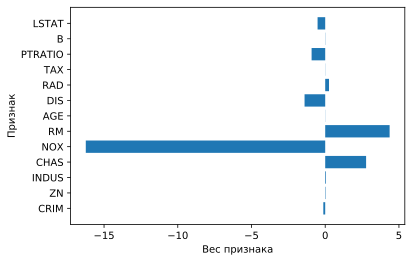

In [41]:
plt.barh(x_train.columns, lr.coef_.flatten())

plt.xlabel('Вес признака')
plt.ylabel('Признак')

plt.show()

### Стандартизация признаков

Не стоит торопиться с выводами о том, какой признак имеет наибольший вклад в итоговую цену. Если мы посмотрим на таблицу `X_train.describe()`, содержащую статистические данные по таблице `X_train`, мы убедимся, что значения по каждому признаку _не отмасштабированы_, т.е. имеют разный масштаб разброса значений (см. строки `mean` и `std`):

In [42]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.468655,11.596306,11.119974,0.076517,0.558326,6.323496,69.147230,3.763440,9.361478,405.311346,18.263852,358.767124,12.513298
std,8.313983,23.093394,6.953401,0.266175,0.119118,0.720086,27.703149,2.112633,8.601322,166.060463,2.263954,87.511867,7.147690
min,0.009060,0.000000,1.210000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081930,0.000000,5.130000,0.000000,0.453000,5.890000,46.250000,2.075400,4.000000,279.000000,16.600000,376.140000,6.865000
50%,0.269380,0.000000,9.690000,0.000000,0.538000,6.226000,78.100000,3.112100,5.000000,330.000000,18.600000,391.340000,11.220000
75%,3.242325,20.000000,18.100000,0.000000,0.639000,6.664500,93.850000,5.250950,16.000000,666.000000,20.200000,395.760000,16.395000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Для решения этой проблемы можно применить _стандартизацию_ признаков. Для этого нужно от значений каждого признака отнять среднее значение этого признака, а затем поделить на среднее квадратическое отклонение этого признака:

$$x_{scaled} = \dfrac{x - x_{mean}}{\sigma_x}$$

После стандартизации каждый признак имеет среднее значение 0 и среднее квадратическое отклонение 1.

Изучем инструменты из библиотеки `sklearn`, с помощью которых можно провести стандартизацию данных:

In [43]:
from sklearn.preprocessing import StandardScaler

С помощью scaler - будем стандартизировать признаки

In [44]:
StandardScaler()

StandardScaler(copy=True, with_mean=True, with_std=True)

In [45]:
scaler = StandardScaler()

"Обучим" объект `scaler` на наших данных, а затем сразу же получим стандартизированные значения. Это можно сделать с помощью одного общего метода `.fit_transform`. (На самом деле этот метод включает в себя два метода: `.fit` и `.transform`.)

С помощью метода `.fin_transform` - вычисляем среднее значение и среднее квадратичное отклонение для каждого признака из DataFrame x-train, после на основе этой информации вычислить стандартизированные значени для каждого признака

**x_train_scaled**

In [46]:
# Получаем массив Numpy под названием x_train_scaled
x_train_scaled = scaler.fit_transform(x_train)

# Преобразуем его в DataFrame
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)

С помощью метода `.transform` - применяется стандартизация к DataFrame x_test_scaled. После получим массив x_test_scaled, в котором каждый признак стандартизирован с помощью среднего значения  и среднеквадратичного отклонения вычесленных на тренировочной выборке

**x_test_scaled**

In [47]:
x_test_scaled = scaler.transform(x_test)

x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

Итак, попробуем обучить нашу модель заново, но уже на стандартизированных данных, и выведем аналогичную диаграмму, но уже для новой моде

In [48]:
lr.fit(x_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

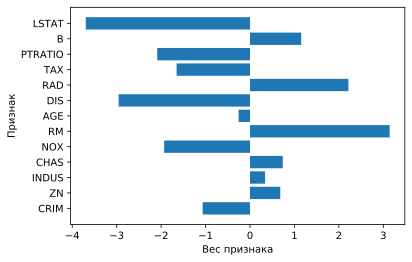

In [49]:
plt.barh(feature_names, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

### Уберём признаки, которые близкие к 0

**Убираем признаки, у котрых веса меньше 0.5**

In [50]:
important_features = [
    feature
    for feature, weight in zip(feature_names, lr.coef_.flatten())
    if np.abs(weight) > 0.5
]

print(important_features)

['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


**Функция для построения модели**

In [51]:
def create_model(x_train, y_train, x_test, y_test, important_features, model):
    model.fit(x_train.loc[:, important_features], y_train)
    y_pred=model.predict(x_test.loc[:, important_features])
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [52]:
create_model(x_train_scaled, y_train, x_test_scaled, y_test, important_features, LinearRegression())

21.79024941647527

In [53]:
initial_mse

22.098694827098036

## Модель линейной регрессии с регулярзацией

В машинном обучении важной проблемой является _переобучение_, и нужно уметь бороться с переобучением обучаемой модели. Переобучение - это когда модель очень хорошо подстраивается под имеющиеся у неё тренировочные данные, однако, на тестовых данных показывает очень плохой результат.

Одним из симптомов переобучения линейных моделей являются очень большие по модулю веса. Бороться с этим можно с помощью _регуляризации_. В библиотеке `sklearn` доступны уже готовые реализации моделей линейной регрессии с L1- и L2-регуляризацией. Это, соответственно, модели `Lasso` и `Ridge` из модуля `sklearn.linear_model`.

In [54]:
from sklearn.linear_model import Lasso, Ridge

При этом, коэффициент регуляризации можно задавать с помощью параметра `alpha` при инициализации этих моделей.

Чем больше `alpha`, тем сильнее происходит борьба с переобучением.

**Lasso**

In [55]:
model_lasso = Lasso(alpha=0.003)

In [56]:
create_model(x_train_scaled, y_train, x_test_scaled, y_test, important_features, model_lasso)

21.811408732029218

**Ridge**

In [57]:
model_ridge = Ridge(alpha=0.001)

In [58]:
create_model(x_train_scaled, y_train, x_test_scaled, y_test, important_features, model_ridge)

21.79027835256985

-----------

# Логистическая регрессия

---------------

_Логистическая регрессия_ - это один из самых простых алгоритмов, используемых в _задачах классификации_ : имеется набор данных, и у каждого объекта есть метка принадлежности к какому-то классу. Наша задача - предсказать эту метку для объекта. Идея логистической регрессии в том, чтобы предсказывать не метку класса, а вероятность принадлежности данного объекта к каждому из классов. 

Рассмотрим алгоритм логистической регрессии для _бинарной классификации_ , т.е. случая, когда различных классов всего 2. В этом случае задача алгоритма логистической регрессии очень похожа на задачу алгоритма линейной регрессии, рассмотренного ранее: модель должна подобрать коэффициенты $w_0, w_1, \dots, w_n$. Как используются эти коэффициенты?

В начале мы делаем то же самое, что и в линейной регрессии. Мы вычисляем значение

$$z = w_0 + w_1 \cdot x_1 + \dots + w_n \cdot x_n.$$

Затем величина $z$ помещается в _сигмоидную функцию_ :
$$f(z) = \dfrac{1}{1 + e^{- z}}.$$

Сигмоидная функция используется для того, чтобы преобразовать число $z$ из промежутка $(- \infty, \infty)$ в число $f(z)$ из промежутка $(0, 1)$. Причём, делается это так, что число $f(z)$ можно теперь интерпретировать как вероятность. В нашем случае это будет вероятность принадлежности объекта $x$ классу 1. Соответственно, вероятность принадлежности объекта классу 0 будет равна $1 - f(z)$.

Алгоритм логистической регрессии минимизирует функцию потерь $logloss$:

$$logloss(x) = - y \cdot \operatorname{ln} (p) - (1 - y) \cdot \operatorname{ln} (1 - p).$$

Здесь $y$ - правильный ответ на объекте $x$ (0 или 1), а $p$ - вычисленная алгоритмом вероятность принадлежности объекта $x$ классу 1.

Для того, чтобы разобраться с деталями модели логистической регрессии, мы будем использовать датасет, содержащий информацию о пассажирах Титаника. Этот датасет можно скачать [здесь](https://www.kaggle.com/c/titanic/data).

## Titanic

In [59]:
# Сразу установим индекс на PassengerId
data = pd.read_csv('input/train.csv')

# data = pd.read_csv('input/train.csv', index_col="PassengerId")

In [60]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [61]:
data = data.set_index('PassengerId')

In [62]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Целевым значением для нас будет значение `"Survived"` - то, выжил пассажир или нет. Вынесем этот столбец в отдельную переменную `y`, а в переменную `X` запишем все столбцы из таблицы `data` кроме столбца `target`:

In [64]:
target = 'Survived'

In [65]:
y = data[target]

In [66]:
x = data.drop(target, axis=1)

### Изучение качества данных и их очистка

In [67]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


Прежде чем приступить к обучении модели, данные необходимо почистить. Мы видим, что всего у нас есть данные о 891 пассажире, однако, многие данные пропущены. Например, в столбце `"Cabin"` всего 204 непустых значения. Этот столбец мы удалим. Также удалим столбцы `"Name"` и `"Ticket"`.

In [68]:
x.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

В поле возраст 20% значений не заполнено. Заменим пропущенные значения на значения среднего возраста.

In [69]:
mean_age = x['Age'].mean()
mean_age

29.69911764705882

In [70]:
x['Age'] = x['Age'].fillna(mean_age)

In [71]:
x['Age'].unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

Отметим, что существует и иной подход к заполнению пропущенных значений, который является более предпочтительным при достаточном количестве данных. Через некоторое время нам предстоит разбить наши данные на тренировочную и валидационную выборку. Мы могли бы сначала сделать это, а затем уже заполнить пропущенные значения средними именно по тренировочной и валидационной выборке, соответственно. Это более предпочтительный подход, поскольку средние значения получатся немного разными, что может предотвратить переобучение.

Здесь, однако, мы этого делать не будем, поскольку данных не слишком много.

Теперь рассмотрим поле `"Embarked"`. Оно текстовое, и здесь всего два пропущенных значения. Посмотрим, как часто встречаются возможные значения этого поля в датасете:

In [72]:
x['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [73]:
embarked_mode = x['Embarked'].mode()[0]
embarked_mode

'S'

Мы видим, что чаще всего встречается значение `"S"`. Заполним им пропущенные значения:

In [74]:
x['Embarked'] = x['Embarked'].fillna(embarked_mode)

In [75]:
x['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [76]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 55.7+ KB


Иногда пропущенные значения не заполняют, а используют факт их пропуска в качестве ещё одного признака. Но в этом уроке мы так делать не будем.

Обычно непрерывные значения заполняют средним или медианой, а категориальные - модой.



### Работа с категориальными признаками

Признак пола пассажира (Sex) - категориальная переменная. Так как в ней два класса, 

то мы можем предствить одной колнкой со значениями 0 и 1:

Чтобы использовать категориальные признаки в нашей модели, нужно перевести их в числовые. Для поля `"Sex"` это сделать легко, поскольку здесь всего два разных значения:

In [77]:
x['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Заменим их на числовые значения 0 и 1:

In [78]:
# sex_map = {
#     "female": 1,
#     "male": 0,
# }

# X["Sex"] = X["Sex"].map(sex_map)

In [79]:
x['Sex'] = (x['Sex'] == 'female').astype(int)

In [80]:
x['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

Признак `"Embarked"` также является категориальным, но содержит более двух категорий, поэтому переводить их в числовые значения нельзя. Вместо этого используют так называемые _dummy-переменные_. Вместо одной переменной `"Embarked"` заведём три переменные `"Embarked_C"`, `"Embarked_Q"` и `"Embarked_S"`. В каждом из этих столбцов теперь будет стоять 1, если у соответствующего объекта переменная `"Embarked"` равна этому значению, и 0, если нет.

Мы могли бы сделать это вручную, однако, в библиотеке `pandas` уже есть готовая функция для этого:

In [81]:
x = pd.get_dummies(x)

In [82]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [83]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
Pclass        891 non-null int64
Sex           891 non-null int32
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int32(1), int64(3), uint8(3)
memory usage: 47.9 KB


In [84]:
x.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,3,0,22.000000,1,0,7.2500,0,0,1
2,1,1,38.000000,1,0,71.2833,1,0,0
3,3,1,26.000000,0,0,7.9250,0,0,1
4,1,1,35.000000,1,0,53.1000,0,0,1
5,3,0,35.000000,0,0,8.0500,0,0,1
6,3,0,29.699118,0,0,8.4583,0,1,0
7,1,0,54.000000,0,0,51.8625,0,0,1
8,3,0,2.000000,3,1,21.0750,0,0,1
9,3,1,27.000000,0,2,11.1333,0,0,1


Несмотря на то, что столбец `"Pclass"` является числовым, его тоже хорошо бы рассматривать как категориальный, поскольку класс пассажира - это именно категория, а не непрерывное значение. Для этого зададим для этого столбца тип `"category"`, чтобы функция `pd.get_dummies` "поняла", что этот столбец тоже нужно обработать.

In [85]:
x['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [86]:
x['Pclass'] = x['Pclass'].astype('category')

In [87]:
x = pd.get_dummies(x)

In [88]:
x.columns

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [89]:
x.head(10)

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,
1,0,22.000000,1,0,7.2500,0,0,1,0,0,1
2,1,38.000000,1,0,71.2833,1,0,0,1,0,0
3,1,26.000000,0,0,7.9250,0,0,1,0,0,1
4,1,35.000000,1,0,53.1000,0,0,1,1,0,0
5,0,35.000000,0,0,8.0500,0,0,1,0,0,1
6,0,29.699118,0,0,8.4583,0,1,0,0,0,1
7,0,54.000000,0,0,51.8625,0,0,1,1,0,0
8,0,2.000000,3,1,21.0750,0,0,1,0,0,1
9,1,27.000000,0,2,11.1333,0,0,1,0,0,1


### Тренировочный, валидационный и тестовый датасеты

Ранее мы упомянули _валидационную_ выборку. Давайте разберёмся, что это такое и зачем она нам нужна. Многие модели машинного обучения имеют параметры, которые влияют на то, каким образом обучается модель. В таких случаях мы используем тренировочную выборку чтобы обучить модель, валидационную чтобы проверить её качество и, если нужно, подправить параметры каким-то образом. Наконец, тестовую выборку мы используем лишь для окончательной проверки качества модели.

Тестовый датасет с данными о пассажирах Титаника можно найти по вышеуказанной ссылке в файле `test.csv`. Мы же здесь работать с этими данными не будем.

Итак, разобьём наши данные на тренировочную и валидационную выборки:

In [90]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25, random_state=42)

### и приступим к построению моделей.

В начале работы над любой задачей рекомендуется сперва построить простую модель, не затрачивая на неё слишком много времени. Затем можно будет уже строить более сложные модели и сравнивать их качество с качеством базовой модели.

Ранее мы перевели все наши признаки в числовые. Попробуем просто построить модель, используя все признаки:

In [91]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 299 to 103
Data columns (total 11 columns):
Sex           668 non-null int32
Age           668 non-null float64
SibSp         668 non-null int64
Parch         668 non-null int64
Fare          668 non-null float64
Embarked_C    668 non-null uint8
Embarked_Q    668 non-null uint8
Embarked_S    668 non-null uint8
Pclass_1      668 non-null uint8
Pclass_2      668 non-null uint8
Pclass_3      668 non-null uint8
dtypes: float64(2), int32(1), int64(2), uint8(6)
memory usage: 32.6 KB


In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
lr = LogisticRegression()

In [94]:
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
y_pred = lr.predict(x_valid)

In [96]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0], dtype=int64)

Метрика Accuracy (Для доли правильных ответов)

Для подсчёта правильных ответов будем использовать метрику _accuracy_ (_точность_). Она равна отношению числа объектов, на которых целевой класс был угадан верно, к общему числу объектов.

In [97]:
from sklearn.metrics import accuracy_score

In [98]:
accuracy_score(y_valid, y_pred)

0.8026905829596412

Также сделаем предсказание на тренировочном датасете и посчитаем точность на нём:

In [99]:
y_pred_train = lr.predict(x_train)

In [100]:
accuracy_score(y_train, y_pred_train)

0.8083832335329342

Как мы видим, точность на тренировочной и обучающей выборках примерно одинаковая. Если точность на обучающей выборке оказывается сильно выше - это означает, что модель переобучилась.

### Вычисление вероятности событий

Мы уже говорили о том, что алгоритм логистической регрессии позволяет получить не только предсказанную метку класса, но и вероятность принадлежности этому классу. Эти вероятности можно получить с помощью метода `.predict_proba`:

In [101]:
y_proba = lr.predict_proba(x_valid)

In [102]:
## Вероятности событий 0 и 1 для каждого пасажира
y_proba

array([[0.88825086, 0.11174914],
       [0.73066428, 0.26933572],
       [0.87036676, 0.12963324],
       [0.08974893, 0.91025107],
       [0.25113482, 0.74886518],
       [0.07820791, 0.92179209],
       [0.33314914, 0.66685086],
       [0.90541514, 0.09458486],
       [0.24423873, 0.75576127],
       [0.10298449, 0.89701551],
       [0.69421831, 0.30578169],
       [0.93503631, 0.06496369],
       [0.62521544, 0.37478456],
       [0.84802204, 0.15197796],
       [0.75860017, 0.24139983],
       [0.07875429, 0.92124571],
       [0.72740906, 0.27259094],
       [0.33306494, 0.66693506],
       [0.70241806, 0.29758194],
       [0.7064301 , 0.2935699 ],
       [0.88406868, 0.11593132],
       [0.64257008, 0.35742992],
       [0.39867144, 0.60132856],
       [0.86966316, 0.13033684],
       [0.89854394, 0.10145606],
       [0.9281918 , 0.0718082 ],
       [0.56595276, 0.43404724],
       [0.72830321, 0.27169679],
       [0.91438978, 0.08561022],
       [0.42690766, 0.57309234],
       [0.

В первом столбце полученного массива стоит вероятность каждого объекта принадлежать классу 0, а во втором - вероятность принадлежать классу 1. Можно заметить, что сумма значений каждой строки равна 1.

###  Сохранение данных

In [103]:
x_train.to_pickle('x_train.pkl')
y_train.to_pickle('y_train.pkl')

x_valid.to_pickle('x_valid.pkl')
y_valid.to_pickle('y_valid.pkl')

------------
# Support Vector Machine

--------


_Support Vector Machine_ или _Метод опорных векторов_ является одним из самых известных методов машинного обучения. Он включает в себя несколько алгоритмов, с помощью которых можно решать задачи как классификации, так и регрессии. 

В задаче классификации метод SVM стремится построить между объектами разных классов "линию" (в пространствах больших размерностей это называется _гиперплоскость_) так, чтобы максимизировать расстояние от этой "линии" до объектов разных классов. Во многих случаях такой метод работает лучше, чем логистическая регрессия.

Алгоритмы метода опорных векторов расположены в модуле `svm` библиотеки `sklearn`. Импортируем из этого модуля модель `SVC` (Support Vector Classifier):

In [104]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC

In [105]:
x_train = pd.read_pickle('x_train.pkl')
y_train = pd.read_pickle('y_train.pkl')

x_valid = pd.read_pickle('x_valid.pkl')
y_valid = pd.read_pickle('y_valid.pkl') 

### Нормализация признаков

Алгоритмы метода SVM чувствительны к ненормализованным и нестандартизованным данным. Поэтому прежде чем строить модель, нам следует масштабировать признаки. Ранее мы уже познакомились со _стандартизацией_: тогда мы вычитали из признаков их среднее значение, а затем делили на среднее квадратическое отклонение. Здесь мы попробуем применить _нормализацию_, т.е. расположить признаки так, чтобы минимальное значение каждого признака оказалось равным 0, а максимальное - 1. Это можно сделать с помощью инструмента `MinMaxScaler` из модуля `sklearn.preprocessing`:

In [106]:
from sklearn.preprocessing import MinMaxScaler

In [107]:
scaler = MinMaxScaler()

In [108]:
x_train.head(10)

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,
299,0,29.699118,0,0,30.5000,0,0,1,1,0,0
885,0,25.000000,0,0,7.0500,0,0,1,0,0,1
248,1,24.000000,0,2,14.5000,0,0,1,0,1,0
479,0,22.000000,0,0,7.5208,0,0,1,0,0,1
306,0,0.920000,1,2,151.5500,0,0,1,1,0,0
317,1,24.000000,1,0,26.0000,0,0,1,0,1,0
3,1,26.000000,0,0,7.9250,0,0,1,0,0,1
406,0,34.000000,1,0,21.0000,0,0,1,0,1,0
743,1,21.000000,2,2,262.3750,1,0,0,1,0,0


In [109]:
x_train.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.342814,29.476233,0.553892,0.372754,32.179397,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,13.009962,1.185279,0.795588,51.604012,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.925000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.699118,0.000000,0.000000,14.400000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,35.000000,1.000000,0.000000,30.500000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
cols_for_scale = ['Age', 'SibSp', 'Parch', 'Fare']

In [111]:
x_train[cols_for_scale] = scaler.fit_transform(x_train[cols_for_scale])

In [112]:
x_train.head(10)

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,
299,0,0.367921,0.000,0.000000,0.059532,0,0,1,1,0,0
885,0,0.308872,0.000,0.000000,0.013761,0,0,1,0,0,1
248,1,0.296306,0.000,0.333333,0.028302,0,0,1,0,1,0
479,0,0.271174,0.000,0.000000,0.014680,0,0,1,0,0,1
306,0,0.006283,0.125,0.333333,0.295806,0,0,1,1,0,0
317,1,0.296306,0.125,0.000000,0.050749,0,0,1,0,1,0
3,1,0.321438,0.000,0.000000,0.015469,0,0,1,0,0,1
406,0,0.421965,0.125,0.000000,0.040989,0,0,1,0,1,0
743,1,0.258608,0.250,0.333333,0.512122,1,0,0,1,0,0


In [113]:
x_train.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.342814,0.365120,0.069237,0.062126,0.062810,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,0.163483,0.148160,0.132598,0.100724,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.271174,0.000000,0.000000,0.015469,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.367921,0.000000,0.000000,0.028107,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.434531,0.125000,0.000000,0.059532,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


Заметим, что для нормализации данных `X_valid` мы использовали не метод `.fit_transform`, а метод `.transform`. Это мотивировано тем, что мы хотели бы, чтобы значения признаков из массивов `X_train` и `X_valid` были согласованы, т.е. чтобы те значения, которые совпадали до нормализации, остались равными и после неё. Поэтому обучать модель заново на значениях из `X_valid` мы не хотим.

In [114]:
x_valid[cols_for_scale] = scaler.transform(x_valid[cols_for_scale])

In [115]:
x_valid.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.00000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,0.381166,0.376310,0.053812,0.068012,0.063003,0.22870,0.085202,0.686099,0.286996,0.192825,0.520179
std,0.486766,0.163162,0.100208,0.139652,0.085059,0.42094,0.279810,0.465121,0.453377,0.395404,0.500717
min,0.000000,0.005152,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.283740,0.000000,0.000000,0.015412,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.367921,0.000000,0.000000,0.029758,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.447097,0.125000,0.166667,0.061155,0.00000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,0.886906,0.500000,0.833333,0.512122,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


### Сохранение и загрузка модели нормализации

In [116]:
from sklearn.externals import joblib

D:\Programs\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [117]:
joblib.dump(scaler, 'min_max_scaler.pkl')

['min_max_scaler.pkl']

In [118]:
scaler = joblib.load('min_max_scaler.pkl')

### Построение модели SVC

In [119]:
clf = SVC()

In [120]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [121]:
y_pred = clf.predict(x_valid)

In [122]:
y_pred_train = clf.predict(x_train)

Оценка Accuarcy

In [123]:
from sklearn.metrics import accuracy_score

In [124]:
accuracy_score(y_valid, y_pred)

0.7847533632286996

In [125]:
accuracy_score(y_train, y_pred_train)

0.7874251497005988

Как мы видим, здесь мы получили более плохую точность, чем ранее, когда использовали модель логистической регрессии. Попробуем получше настроить модель.


### Тюнинг модели SVC

У модели SVC есть параметр `C`, который штрафует за ошибку классификации. По умолчанию этот параметр равен 1. Зададим несколько возможных значений для этого параметра и посмотрим, какие значения являются наиболее выгодными:

In [126]:
c_vals = np.logspace(-2, 5, 29)
c_vals

array([1.00000000e-02, 1.77827941e-02, 3.16227766e-02, 5.62341325e-02,
       1.00000000e-01, 1.77827941e-01, 3.16227766e-01, 5.62341325e-01,
       1.00000000e+00, 1.77827941e+00, 3.16227766e+00, 5.62341325e+00,
       1.00000000e+01, 1.77827941e+01, 3.16227766e+01, 5.62341325e+01,
       1.00000000e+02, 1.77827941e+02, 3.16227766e+02, 5.62341325e+02,
       1.00000000e+03, 1.77827941e+03, 3.16227766e+03, 5.62341325e+03,
       1.00000000e+04, 1.77827941e+04, 3.16227766e+04, 5.62341325e+04,
       1.00000000e+05])

In [127]:
accuracy_valid = []
accuracy_train = []

for val in c_vals:
    clf = SVC(C=val)
    
    clf.fit(x_train, y_train)
    
    y_pred = clf.predict(x_valid)
    y_pred_train = clf.predict(x_train)
        
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    
    accuracy_valid.append(acc_valid)
    accuracy_train.append(acc_train)
    
    print(f'C = {val} \n\tacc_valid = {acc_valid}\n\tcc_train = {acc_train}')

C = 0.01 
	acc_valid = 0.600896860986547
	cc_train = 0.6212574850299402
C = 0.01778279410038923 
	acc_valid = 0.600896860986547
	cc_train = 0.6212574850299402
C = 0.03162277660168379 
	acc_valid = 0.600896860986547
	cc_train = 0.6212574850299402
C = 0.05623413251903491 
	acc_valid = 0.7802690582959642
	cc_train = 0.7889221556886228
C = 0.1 
	acc_valid = 0.7847533632286996
	cc_train = 0.7874251497005988
C = 0.1778279410038923 
	acc_valid = 0.7847533632286996
	cc_train = 0.7874251497005988
C = 0.31622776601683794 
	acc_valid = 0.7847533632286996
	cc_train = 0.7874251497005988
C = 0.5623413251903491 
	acc_valid = 0.7847533632286996
	cc_train = 0.7874251497005988
C = 1.0 
	acc_valid = 0.7847533632286996
	cc_train = 0.7874251497005988
C = 1.7782794100389228 
	acc_valid = 0.7847533632286996
	cc_train = 0.7934131736526946
C = 3.1622776601683795 
	acc_valid = 0.8071748878923767
	cc_train = 0.812874251497006
C = 5.623413251903491 
	acc_valid = 0.8071748878923767
	cc_train = 0.812874251497006
C 

In [128]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

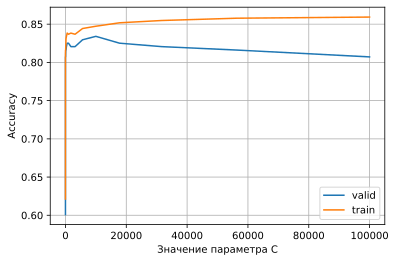

In [129]:
plt.plot(c_vals, accuracy_valid, label="valid")
plt.plot(c_vals, accuracy_train, label="train")

plt.xlabel('Значение параметра C')
plt.ylabel('Accuracy')

plt.legend()
plt.grid()

plt.show()

Как мы видим, точность на валидационных данных до определённого момента растёт, но затем начинает падать. Пик точности попадает приблизительно на значение $C = 10000$. Дальше мы видим спад точности на валидационных данных, однако, точность на тренировочных данных продолжает расти. Это означает, что модель начинает переобучаться.

Можно заметить, что точность на валидационных данных при $C = 10000$ уже выше, чем при использовании логистической регрессии, а также выше, чем при использовании SVM без настройки параметров.

---------
# KNN

-----

KNN расшифровывается как _K Nearest Neighbours_ или _K ближайших соседей_. Это один из самых простых в понимании методов машинного обучения. Представим каждый объект из рассматриваемых данных в виде точки в пространстве признаков. Метод KNN основан на предположении, что объекты одного класса расположены в пространстве близко друг к другу. Раз так, то можно классифицировать новый объект исходя из того, какие объекты находятся в пространстве рядом с ним.

In [130]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [131]:
from sklearn.neighbors import KNeighborsClassifier

In [132]:
x_train = pd.read_pickle('x_train.pkl')
y_train = pd.read_pickle('y_train.pkl')

x_valid = pd.read_pickle('x_valid.pkl')
y_valid = pd.read_pickle('y_valid.pkl') 

### Масштабирование признаков с использованием RobustScaler

В первую очередь, раз мы работаем с расстояниями между объектами, нам необходимо отмасштабировать признаки так, чтобы они вносили в это расстояние соизмеримый вклад. Делать это мы будем с помощью `RobustScaler`. При таком подходе масштабирования признаков минимизируется влияние выбросов в данных. Это достигается за счёт того, что при масштабировании используется медиана и интерквартильный размах.

In [133]:
from sklearn.preprocessing import RobustScaler

In [134]:
x_train.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.342814,29.476233,0.553892,0.372754,32.179397,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,13.009962,1.185279,0.795588,51.604012,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.925000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.699118,0.000000,0.000000,14.400000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,35.000000,1.000000,0.000000,30.500000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [135]:
cols_for_scale = ['Age', 'SibSp', 'Parch', 'Fare']

In [136]:
scaler = RobustScaler()

In [137]:
x_train[cols_for_scale] = scaler.fit_transform(x_train[cols_for_scale])

In [138]:
x_train.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.342814,-0.017145,0.553892,0.372754,0.787570,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,1.000766,1.185279,0.795588,2.285892,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,-2.252240,0.000000,0.000000,-0.637874,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.592240,0.000000,0.000000,-0.286822,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.407760,1.000000,0.000000,0.713178,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.869299,8.000000,6.000000,22.056664,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [139]:
x_valid[cols_for_scale] = scaler.transform(x_valid[cols_for_scale])

### Классификация с помощью KNN

Итак, построим нашу модель. Идея метода заключается в том, что, классифицируя некоторый объект, мы смотрим на `K` его ближайших соседей и смотрим, представителей какого класса среди этих соседей больше всего. К такому классу мы и относим классифицируемый объект.

Построим модель для различных `K` чтобы подобрать наиболее удачное значение. По умолчанию оно равно 5.

In [140]:
k_vals = np.arange(2, 10)

In [141]:
accuracy_valid = []
accuracy_train = []

for val in k_vals:
    clf = KNeighborsClassifier(n_neighbors=val)
    
    clf.fit(x_train, y_train)
    
    y_pred = clf.predict(x_valid)
    y_pred_train = clf.predict(x_train)
        
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    
    accuracy_valid.append(acc_valid)
    accuracy_train.append(acc_train)
    
    print(f'n_neighbors = {val} \n\tacc_valid = {acc_valid} \n\tacc_train = {acc_train}')

n_neighbors = 2 
	acc_valid = 0.7937219730941704 
	acc_train = 0.8772455089820359
n_neighbors = 3 
	acc_valid = 0.8161434977578476 
	acc_train = 0.875748502994012
n_neighbors = 4 
	acc_valid = 0.7892376681614349 
	acc_train = 0.8458083832335329
n_neighbors = 5 
	acc_valid = 0.8071748878923767 
	acc_train = 0.8637724550898204
n_neighbors = 6 
	acc_valid = 0.8251121076233184 
	acc_train = 0.8353293413173652
n_neighbors = 7 
	acc_valid = 0.7847533632286996 
	acc_train = 0.8323353293413174
n_neighbors = 8 
	acc_valid = 0.7713004484304933 
	acc_train = 0.8173652694610778
n_neighbors = 9 
	acc_valid = 0.7802690582959642 
	acc_train = 0.8173652694610778


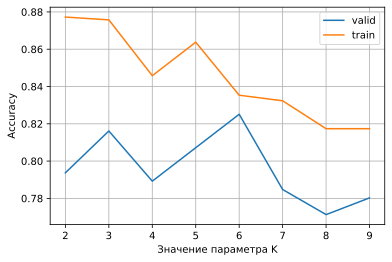

In [142]:
plt.plot(k_vals, accuracy_valid, label="valid")
plt.plot(k_vals, accuracy_train, label="train")

plt.xlabel('Значение параметра K')
plt.ylabel('Accuracy')

plt.legend()
plt.grid()

plt.show()

Мы видим, что при малых значениях `K` модель склонна к переобучению. Оптимальном выбором является число $K = 6$. Построим модель ещё раз, используя эти знания.

In [143]:
clf = KNeighborsClassifier(n_neighbors=6)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_valid)

In [144]:
accuracy_score(y_valid, y_pred)

0.8251121076233184

Полученная точность также выше, чем при использовании логистической регрессии.

## Метрики качества классификационных моделей

Ранее мы для задач классификации использовали только метрику _accuracy_, которая равна доле правильных ответов классификатора к общему количеству объектов в выборке. Такая метрика очень плохо работает в случае несбалансированной выборки (т.е. случая, когда объектов одного класса сильно больше, чем объектов другого). Представим ситуацию: мы классифицируем объекты, среди которых 950 объектов класса 1 и 50 объектов класса 0. На таких данных даже классификатор, который относит все объекты к классу 1 без разбора, даст точность 0.95. Для таких случаев рекомендуется использовать другие метрики качества.

Разберёмся подробнее в результатах, которые мы только что получили с помощью классификатора KNN. Для этого будем использовать _confusion matrix_, т.е. _матрицу ошибок_.

Метрика `accuracy` не пригодна для не сбалансировнных выборок, то есть для выборок где число объектов одно класса значительно превосходит  число объектов другого класса.

### Точность и полнота

Около 60 % утанувших и около 40 % выживших

In [145]:
y_valid.value_counts(normalize=True)

0    0.600897
1    0.399103
Name: Survived, dtype: float64

### Матрица ошибок

In [146]:
from sklearn.metrics import confusion_matrix

In [147]:
confusion_matrix(y_valid, y_pred)

array([[123,  11],
       [ 28,  61]], dtype=int64)

Данная матрица содержит в себе 4 значения:

* True Negative (TN) - случаи, когда мы правильно классифицировали объект как объект класса 0 (левое верхнее значение)
* False Positive (FP) - случаи, когда мы классифицировали объект как объект класса 1, хотя, он на самом деле имеет класс 0 (правое верхнее)
* False Negative (FN) - классифицировали объект как объект класса 0, а на самом деле он имеет класс 1 (левое нижнее)
* True Positive (TP) - правильно классифицировали объект как объект класса 1 (правое нижнее)

**True Negative**

In [148]:
TN = ((y_valid == 0) & (y_pred == 0)).sum()
TN

123

**False Positive**

In [149]:
FP = ((y_valid == 0) & (y_pred == 1)).sum()
FP

11

**False Negative**

In [150]:
FN = ((y_valid == 1) & (y_pred == 0)).sum()
FN

28

**True Positive**

In [151]:
TP = ((y_valid == 1) & (y_pred == 1)).sum()
TP

61

**Normalized confusion matrix**

После нормализации матрицы ошибок, получаем не абсолютные значения, а доли, в сумме они выдают 1

In [152]:
cm = confusion_matrix(y_valid, y_pred) / y_valid.shape[0]
cm

array([[0.55156951, 0.04932735],
       [0.12556054, 0.2735426 ]])

### Метрики на основе значений матрицы ошибок

**Точность**

Метрика _Precision_ (точность) является долей объектов класса 1, верно классифицированных моделью, к общему числу объектов, которые модель классифицировала как объекты класса 1. Т.е.

$$precision = \dfrac{TP}{TP + FP}.$$

Доля правильно угданных выживших от всех тех, кого предсказали выжившими

In [153]:
Precision = TP / (TP + FP)
Precision

0.8472222222222222

Данную метрику можно также сразу посчитать по предсказанным данным с помощью функции `precision_score` из модуля `sklearn.metrics`.

In [154]:
from sklearn.metrics import precision_score

In [155]:
precision_score(y_valid, y_pred)

0.8472222222222222

**Полнота**

Метрика _recall_ (_полнота_) является долей найденных моделью объектов класса 1:

$$recall = \dfrac{TP}{TP + FN}.$$

Доля правильно угаданных выживших, кто действительно выжил

In [156]:
Recall = TP / (TP + FN)
Recall

0.6853932584269663

In [157]:
from sklearn.metrics import recall_score

In [158]:
recall_score(y_valid, y_pred)

0.6853932584269663

### F1 score

сочетает в себе точность и полноту

$$F_1 = 2 \cdot \dfrac{precision \cdot recall}{precision + recall}.$$

Чем ближе F1 score к 1, тем лучше модель

In [159]:
F1 = 2 * (Precision * Recall) / (Precision + Recall)
F1

0.7577639751552795

In [160]:
from sklearn.metrics import f1_score

In [161]:
f1_score(y_valid, y_pred)

0.7577639751552795

### AUC

Следующей часто используемой метрикой является метрика _AUC_ или _Area Under Curve_ (площадь под кривой). Часто в качестве кривой используется кривая _ROC_. Разберёмся, что это за кривая. Для этого нам нужно получить не просто метки класса для каждого классифицируемого объекта, а вероятности принадлежности к классу 1. Это можно сделать с помощью метода `.predict_proba`:

In [162]:
y_pred_proba = clf.predict_proba(x_valid)

In [163]:
y_pred_proba

array([[0.66666667, 0.33333333],
       [0.83333333, 0.16666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.16666667, 0.83333333],
       [0.83333333, 0.16666667],
       [0.5       , 0.5       ],
       [0.16666667, 0.83333333],
       [0.66666667, 0.33333333],
       [0.83333333, 0.16666667],
       [0.83333333, 0.16666667],
       [1.        , 0.        ],
       [0.83333333, 0.16666667],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.16666667, 0.83333333],
       [1.        , 0.        ],
       [0.83333333, 0.16666667],
       [0.83333333, 0.16666667],
       [0.5       , 0.5       ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.83333333, 0.16666667],
       [0.66666667, 0.33333333],
       [0.83333333, 0.16666667],
       [0.66666667, 0.33333333],
       [0.5       , 0.5       ],
       [0.

Данный метод возвращает для каждого классифицируемого объекта список из двух значений. Первой идёт вероятность принадлежности классу 0, а второй - вероятность принадлежности классу 1. Как мы видим, сумма двух значений всегда равна 1. 

Нам понадобится лишь вероятность принадлежности классу 1:

In [164]:
y_pred_proba = y_pred_proba[:, 1]

In [165]:
y_pred_proba

array([0.33333333, 0.16666667, 0.        , 1.        , 0.5       ,
       1.        , 0.83333333, 0.16666667, 0.5       , 0.83333333,
       0.33333333, 0.16666667, 0.16666667, 0.        , 0.16666667,
       1.        , 0.33333333, 0.83333333, 0.        , 0.16666667,
       0.16666667, 0.5       , 0.33333333, 0.        , 0.        ,
       0.16666667, 0.33333333, 0.16666667, 0.33333333, 0.5       ,
       0.16666667, 0.66666667, 0.33333333, 0.5       , 0.16666667,
       0.33333333, 0.5       , 0.83333333, 0.5       , 0.        ,
       0.16666667, 0.16666667, 0.        , 0.16666667, 0.5       ,
       0.16666667, 0.16666667, 0.        , 0.16666667, 0.5       ,
       0.33333333, 0.5       , 0.        , 0.66666667, 0.        ,
       0.83333333, 0.33333333, 0.83333333, 1.        , 0.66666667,
       0.16666667, 1.        , 0.66666667, 0.5       , 0.16666667,
       0.66666667, 0.33333333, 0.        , 0.33333333, 1.        ,
       0.83333333, 0.83333333, 0.33333333, 1.        , 0.     

**Пассажир выжил**

Text(0, 0.5, 'Density')

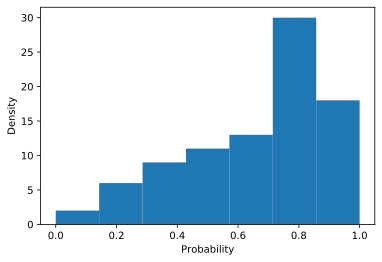

In [166]:
plt.hist(y_pred_proba[y_valid == 1], bins=7)

plt.xlabel("Probability")
plt.ylabel("Density")

Наибольшее число случаев имеет вероятность к 1

**Пассажир погиб**

Text(0, 0.5, 'Density')

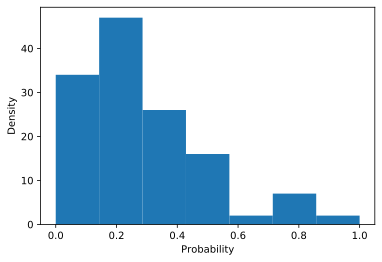

In [167]:
plt.hist(y_pred_proba[y_valid == 0], bins=7)

plt.xlabel("Probability")
plt.ylabel("Density")

Предсказанные вероятности ближе к 0

**Наложение диаграмм**

По вертикальной оси, вместо количества пассажиров, расположим плотность вероятностей

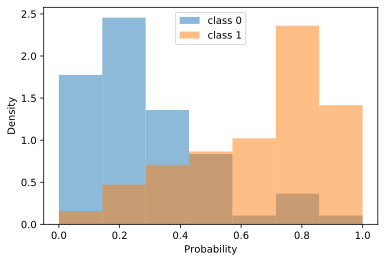

In [168]:
plt.hist(y_pred_proba[y_valid == 0], bins=7, density=True, label='class 0', alpha=0.5)
plt.hist(y_pred_proba[y_valid == 1], bins=7, density=True, label='class 1', alpha=0.5)

plt.xlabel("Probability")
plt.ylabel("Density")

plt.legend()

Мы видим, что наша модель неплохо разделила объекты классов 0 и 1.

Теперь построим ROC-кривую. Для этого нам понадобятся следующие значения:

* $FPR = \dfrac{FP}{FP + TN}$ - False Positive Rate, т.е. доля False Positive

* $TPR = \dfrac{TP}{TP + FN}$ - True Positive Rate, т.е. доля True Positive (совпадает с recall)

На основании этих метрик строится ROC-кривая. Посчитаем эти значения с помощью функции `roc_curve` из модуля `sklearn.metrics`:

In [169]:
from sklearn.metrics import roc_curve

In [170]:
# pos_label=1 - это означает, что мы считаетакм class 1  позитивным
fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba, pos_label=1)

In [171]:
fpr

array([0.        , 0.01492537, 0.06716418, 0.08208955, 0.20149254,
       0.39552239, 0.74626866, 1.        ])

In [172]:
tpr

array([0.        , 0.20224719, 0.53932584, 0.68539326, 0.80898876,
       0.91011236, 0.97752809, 1.        ])

In [173]:
thresholds

array([2.        , 1.        , 0.83333333, 0.66666667, 0.5       ,
       0.33333333, 0.16666667, 0.        ])

Здесь параметр `pos_label` - метка того класса, который мы считаем позитивным. В нашем случае это класс 1.

Идея ROC-кривой состоит в следующем. Если у нас есть массив с вероятностями принадлежности объектов классу 1, то порог, по которому принимается решение, мы можем выбирать сами. Например, если мы возьмём в качестве порога 1, то модель будет классифицировать объекты как объекты класса 1 только если классификатор на них абсолютно уверен (т.е. вероятность равна 1). Мы также можем взять этот порог и меньше: $0.9$, $0.7$, $0.5$ и т.д. Каждому такому выбору порога соответствуют свои значения FPR и TPR.

Итак, будем постепенно уменьшать порог, начиная с 1, и смотреть, в какие моменты значения FPR и TPR меняются. Как только какое-нибудь из этих значений изменилось, мы будем сохранять текущее значение FPR, TPR, а также значение порога, на котором произошло изменение. Именно эти значения и возвращает функция `roc_curve`.

Возьмём первый порог **thresholds = 2**, вероятности = 2 не бывает, тут имеется ввиду веротяность выше 1 - у нас нет такой веротности, а значит все объекты мы отнесём к негативному классу - это означает что fp = 0, соответственно fpr тоже равен 0, tpr = 0, так как мы не предсказали ни одного позитивного класса.

**thresholds = 1**

In [174]:
# FPR для порога, равного 1
((y_valid == 0) & (y_pred == 1) & (y_pred_proba >= 1)).sum() / (y_valid == 0).sum()

0.014925373134328358

In [175]:
# TPR для порога, равного 1
((y_valid == 1) & (y_pred == 1) & (y_pred_proba >= 1)).sum() / (y_valid == 1).sum()

0.20224719101123595

**thresholds = 0.83333333**

In [176]:
# FPR для порога, равного 0.83333333
((y_valid == 0) & (y_pred == 1) & (y_pred_proba >= 0.83333333)).sum() / (y_valid == 0).sum()

0.06716417910447761

In [177]:
# TPR для порога, равного 1
((y_valid == 1) & (y_pred == 1) & (y_pred_proba >= 0.83333333)).sum() / (y_valid == 1).sum()

0.5393258426966292

**Построение ROC-кривой по найденным точкам**

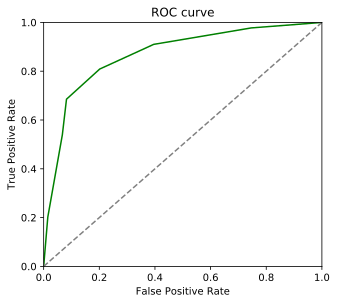

In [178]:
plt.rcParams['figure.figsize'] = 5, 4.5

plt.plot(fpr, tpr, color='green')
plt.plot([0, 1], [0, 1], color='grey', linestyle='dashed')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

plt.show()

Чем больше площадь под этой кривой, тем лучше разделяющая способность модели

**Подсчёт этой площади**

In [179]:
from sklearn.metrics import roc_auc_score

In [180]:
roc_auc_score(y_valid, y_pred_proba)

0.8679356028844541

--------

## Деревья решений и случайный лес

---
_Дерево решений_ - один из самых легко интерпретируемых методов машинного обучения. При использовании этого метода по тренировочным данным строится бинарное дерево, в каждом узле которого происходит разбиение данных по значению какого-то признака. На конце каждой ветки дерева (т.е. в каждом её _листе_) располагается метка класса, к которому следует отнести те объекты, которые дошли до соответствующего листа.

In [181]:
from sklearn.tree import DecisionTreeClassifier

In [182]:
x_train = pd.read_pickle('x_train.pkl')
y_train = pd.read_pickle('y_train.pkl')

x_valid = pd.read_pickle('x_valid.pkl')
y_valid = pd.read_pickle('y_valid.pkl') 

Разберёмся с тем, какие параметры есть у модели `DecisionTreeClassifier`, и как их настраивать. Первый интересующий нас параметр - максимальная глубина дерева или `max_depth`. Деревья большой глубины склонны к переобучению: модель просто слишком детально подстраивается под тренировочные данные.

In [183]:
max_depth_arr = np.arange(2, 20)
max_depth_arr

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])

In [184]:
accuracy_valid = []
accuracy_train = []

for val in max_depth_arr:
    clf = DecisionTreeClassifier(max_depth=val, random_state=100)
    
    clf.fit(x_train, y_train)
    
    y_pred = clf.predict(x_valid)
    y_pred_train = clf.predict(x_train)
        
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    
    accuracy_valid.append(acc_valid)
    accuracy_train.append(acc_train)
    
    print(f'n_neighbors = {val} \n\tacc_valid = {acc_valid} \n\tacc_train = {acc_train}')

n_neighbors = 2 
	acc_valid = 0.7757847533632287 
	acc_train = 0.8023952095808383
n_neighbors = 3 
	acc_valid = 0.8026905829596412 
	acc_train = 0.8323353293413174
n_neighbors = 4 
	acc_valid = 0.8071748878923767 
	acc_train = 0.842814371257485
n_neighbors = 5 
	acc_valid = 0.8026905829596412 
	acc_train = 0.8488023952095808
n_neighbors = 6 
	acc_valid = 0.7713004484304933 
	acc_train = 0.8577844311377245
n_neighbors = 7 
	acc_valid = 0.8116591928251121 
	acc_train = 0.875748502994012
n_neighbors = 8 
	acc_valid = 0.7623318385650224 
	acc_train = 0.8967065868263473
n_neighbors = 9 
	acc_valid = 0.7713004484304933 
	acc_train = 0.9131736526946108
n_neighbors = 10 
	acc_valid = 0.7443946188340808 
	acc_train = 0.9341317365269461
n_neighbors = 11 
	acc_valid = 0.7533632286995515 
	acc_train = 0.9491017964071856
n_neighbors = 12 
	acc_valid = 0.7488789237668162 
	acc_train = 0.9580838323353293
n_neighbors = 13 
	acc_valid = 0.7443946188340808 
	acc_train = 0.9700598802395209
n_neighbors = 

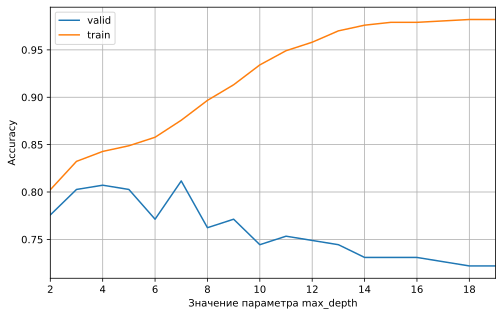

In [185]:
plt.rcParams['figure.figsize'] = 8, 5

plt.plot(max_depth_arr, accuracy_valid, label="valid")
plt.plot(max_depth_arr, accuracy_train, label="train")

plt.xlabel('Значение параметра max_depth')
plt.ylabel('Accuracy')

plt.legend()
plt.grid()

plt.xlim(2, 19)

plt.show()

Это мы и наблюдаем: при достаточно больших значениях параметра `max_depth` точность на тренировочных данных почти достигает 1. На валидационных же данных точность достигает своего пика приблизительно на значении `max_depth = 7`, а затем начинает падать.

In [186]:
clf = DecisionTreeClassifier(max_depth=7, random_state=100)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_valid)

In [187]:
accuracy_score(y_valid, y_pred)

0.8116591928251121

Даже в лучшем случае мы получаем точность, которая уступает точности других рассмотренных нами моделей. 

Рассмотрим теперь алгоритм, основанный на деревьях решений, но являющийся более сложным, а именно со _Случайным лесом_ или _Random forest_.

### Random Forest

В этом алгоритме используется _ансамбль_ деревьев решений. Для каждого обучаемого дерева решений создаётся подвыборка из исходной тренировочной выборки, кроме того, при обучении каждого дерева используется лишь часть признаков. 

На этапе предсказания мы учитываем ответы, полученные каждым из деревьев, и выбираем тот ответ, за который "проголосовало" наибольшее количество деревьев. Это позволяет, в частности, уменьшить влияние переобучения каждого из деревьев.

In [188]:
from sklearn.ensemble import RandomForestClassifier

Рассмотрим несколько параметров данной модели:

* `n_estimators` - число деревьев в ансамбле
* `max_features` - максимальное число признаков, которое может быть использовано при построении каждого дерева
* `max_depth` - максимальная глубина дерева

Для того, чтобы выбрать подходящий набор параметров, можно использовать _Grid search_ или поиск по сетке. Этот метод используется для того, чтобы перебрать все возможные комбинации параметров и выбрать ту комбинацию, которая максимизирует выбранную нами метрику. Можно воспользоваться готовой реализацией из библиотеки `sklearn`.

In [189]:
from sklearn.model_selection import GridSearchCV

In [190]:
parameters = [{'n_estimators': [150, 200, 250],
               'max_features': np.arange(5, 9),
               'max_depth': np.arange(5, 10),}]

In [191]:
clf = GridSearchCV(estimator=RandomForestClassifier(random_state=100),
                   param_grid=parameters,
                   scoring='accuracy',
                   cv=5)

`GridSearchCV` - это классификатор, который строится на основе модели `estimator`, пробегая все комбинации значений из `param_grid`. Для каждой комбинации параметров по кросс-валидации на указанном количестве _фолдов_ считается метрика, указанная в `scoring`. Наконец, выбирается та комбинация параметров, при которой выбранная метрика оказалась максимальной, и дальше для предсказания используется именно этот набор параметров.

### Кросс-валидация

При оценке каждой построенной в процессе модели используется _кросс-валидация_. Это метод, при котором вся обучающая выборка разбивается на заданное число _фолдов_ (частей), и по очереди каждый из этих фолдов выкидывается из тренировочной выборки и используется для валидации. Другими словами, если `cv=5`, то мы строим 5 моделей, для каждой из них выкидывая один из фолдов из обучающей выборки. Затем значения выбранной метрики усредняются на этих 5 моделях.

In [192]:
clf.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[

In [193]:
clf.best_params_

{'max_depth': 5, 'max_features': 5, 'n_estimators': 200}

In [194]:
cv_results = pd.DataFrame(clf.cv_results_)

cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_n_estimators', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [195]:
param_columns = [
    column
    for column in cv_results.columns
    if column.startswith('param_')
]

score_columns = ['mean_test_score', 'std_test_score']

cv_results = (cv_results[param_columns + score_columns]
              .sort_values(by=score_columns, ascending=False))

cv_results.head(10)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score
1,5,5,200,0.824850,0.034466
17,6,6,250,0.823353,0.039172
7,5,7,200,0.823353,0.037422
6,5,7,150,0.821856,0.038579
8,5,7,250,0.821856,0.036479
0,5,5,150,0.821856,0.035049
20,6,7,250,0.821856,0.033941
2,5,5,250,0.821856,0.033417
16,6,6,200,0.820359,0.041573
15,6,6,150,0.820359,0.040802


In [196]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print(f'{mean:.3f} (+/- {round(std * 2, 3)}) for {params}')

0.822 (+/- 0.07) for {'max_depth': 5, 'max_features': 5, 'n_estimators': 150}
0.825 (+/- 0.069) for {'max_depth': 5, 'max_features': 5, 'n_estimators': 200}
0.822 (+/- 0.067) for {'max_depth': 5, 'max_features': 5, 'n_estimators': 250}
0.819 (+/- 0.079) for {'max_depth': 5, 'max_features': 6, 'n_estimators': 150}
0.819 (+/- 0.079) for {'max_depth': 5, 'max_features': 6, 'n_estimators': 200}
0.820 (+/- 0.079) for {'max_depth': 5, 'max_features': 6, 'n_estimators': 250}
0.822 (+/- 0.077) for {'max_depth': 5, 'max_features': 7, 'n_estimators': 150}
0.823 (+/- 0.075) for {'max_depth': 5, 'max_features': 7, 'n_estimators': 200}
0.822 (+/- 0.073) for {'max_depth': 5, 'max_features': 7, 'n_estimators': 250}
0.819 (+/- 0.061) for {'max_depth': 5, 'max_features': 8, 'n_estimators': 150}
0.816 (+/- 0.068) for {'max_depth': 5, 'max_features': 8, 'n_estimators': 200}
0.820 (+/- 0.066) for {'max_depth': 5, 'max_features': 8, 'n_estimators': 250}
0.817 (+/- 0.058) for {'max_depth': 6, 'max_features'

In [197]:
y_pred = clf.predict(x_valid)
accuracy_score(y_valid, y_pred)

0.8161434977578476

In [200]:
clf = RandomForestClassifier(max_depth=5, max_features=5, n_estimators=200, random_state=100)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_valid)

In [199]:
accuracy_score(y_valid, y_pred)

0.8161434977578476